# Plotting Poles and Zeros from Transfer Function

This notebook goes over plotting the poles and zeros for a mass-spring-damper system with seismic input as shown below.

<img width="33%" src="figures/MassSpringDamper_Seismic.png" alt="MCHE201 Stepper Motor Hardware Setup"/>

The equation of motion describing the system is:

$m \ddot{x} + c \dot{x} + k x = c \dot{y} + k y$

Normalizing this equation by $m$ gives:

$\ddot{x} + 2\zeta\omega_n \dot{x} + \omega_n^2 x = 2\zeta\omega_n \dot{y} + \omega_n^2 y$

Finally, the transfer function for this equation is:

$\frac{X(s)}{Y(s)}=\frac{2\zeta\omega_n s+ \omega_n^2}{s^2+2\zeta\omega_n+\omega_n^2}$

Now on to the coding (fun?) part.

Start by importing the necessary modules and packages.

In [2]:
import numpy as np # general math/array operations package
import control # name should be self explanatory
import matplotlib.pyplot as plt # plotting library

Next, define the parameters for which the system will be evaluated.

In [3]:
m = 1 # mass (kg)
zeta = 0.1 # damping ratio
w_n = 2*np.pi # natural frequency (rad/sec)

To define the transfer function using the controls library, the numerator and denominator must be defined as 1-D arrays.

In [19]:
# Define the numerator and denominator of the transfer function
num = [2*zeta*w_n, w_n**2]
den = [1, 2 * zeta * w_n, w_n**2]

Starting from the right side of the array, the numerator should be `w_n**2` which is multiplied by $s^0$, and `2*zeta*w_n` which is multiplied by $s^1$. While the denominator should be `w_n**2` which is multiplied by $s^0$, then `2\zeta\w_n` multiplied by $s^1$, and `1` $s^2$.

Define the transfer function by passing `num` and `den` to the tf() function in the `control` library.

In [20]:
# Define the transfer function form of the system defined by num and den
sys = control.tf(num, den)

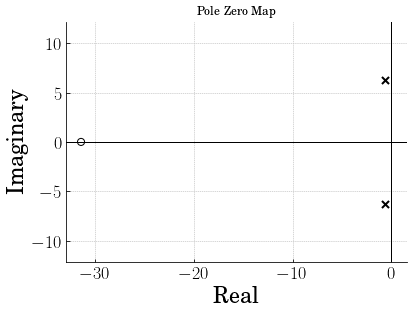

In [21]:
poles, zeros = control.pzmap(sys)

We can also evaluate the step response for this system.

In [22]:
control.step_response(sys, T=None, X0=0.0, input=None, output=None, T_num=None, transpose=False, return_x=False, squeeze=None)

time = np.linspace(0,5,100) # create time array between 0 and 5 seconds with 50 samples

t, xout = control.step_response(sys,T=time)


We can now plot the response:

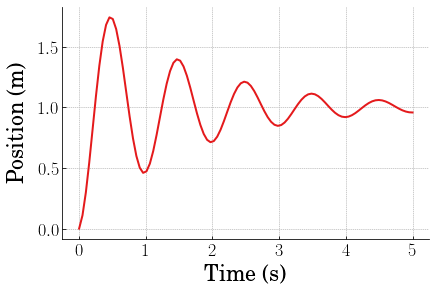

In [23]:
#############################################################
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units font
plt.setp(ax.get_ymajorticklabels(),fontsize=18)
plt.setp(ax.get_xmajorticklabels(),fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Position (m)', fontsize=22, weight='bold', labelpad=10)

plt.plot(time, xout, linewidth=2, linestyle='-', label=r'Response')
# uncomment below and set limits if needed
# plt.xlim(0,5)
# plt.ylim(-0.01,2.5)

# # Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', ncol = 1, fancybox=True, )
# ltext  = leg.get_texts()
# plt.setp(ltext,fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# plt.savefig('plot_filename.pdf')

# plt.show()